In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
import math



In [2]:
dat = pd.read_csv('hyperparam_mura.csv')

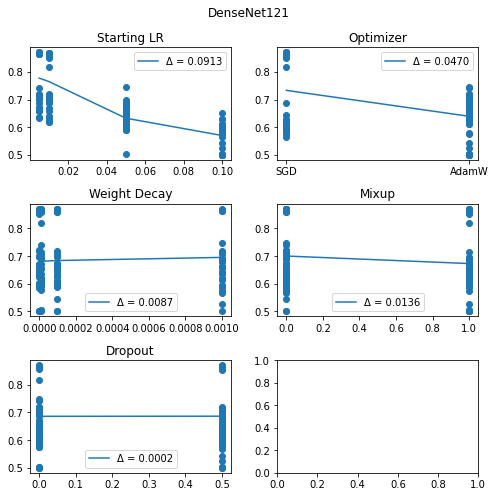

In [3]:
arch = 'DenseNet121'
dat_ = dat[dat['Architecture']==arch]

x_size = 2
y_size = 3
fig, axs = plt.subplots(y_size,x_size, figsize=(7,7))
fig.patch.set_facecolor('white')

for i, h in enumerate(['Starting LR','Optimizer','Weight Decay','Mixup','Dropout']):
  axs[math.floor(i/x_size),i%x_size].scatter(dat_[h], dat_['AUC Val'])
  
  dat_m = dat_.groupby(h).agg('mean').reset_index()
  axs[math.floor(i/x_size),i%x_size].plot(dat_m[h], dat_m['AUC Val'], label='Δ = {:.4f}'.format(dat_m['AUC Val'].max() - dat_['AUC Val'].mean()))
  axs[math.floor(i/x_size),i%x_size].legend()
  
  axs[math.floor(i/x_size),i%x_size].set_title(h)
  
plt.suptitle(arch)
fig.tight_layout()
plt.show()

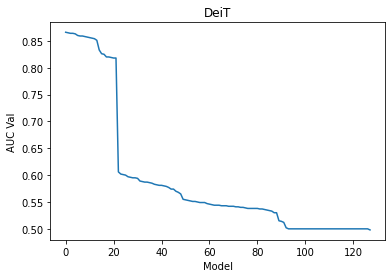

In [4]:
d = dat[dat['Architecture']=='DeiT'].sort_values('AUC Val', ascending=False).reset_index()

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(d.index, d['AUC Val'])
plt.title('DeiT')
plt.ylabel('AUC Val')
plt.xlabel('Model')
plt.show()
d[:32].to_csv('deit.csv')

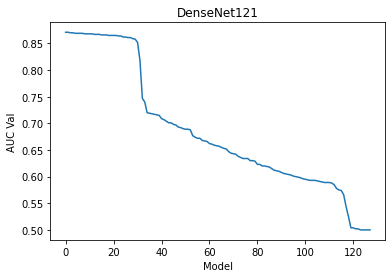

In [5]:
d = dat[dat['Architecture']=='DenseNet121'].sort_values('AUC Val', ascending=False).reset_index()

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(d.index, d['AUC Val'])
plt.title('DenseNet121')
plt.ylabel('AUC Val')
plt.xlabel('Model')
plt.show()
d[:32].to_csv('densenet.csv')